## 6-1 Period Noise

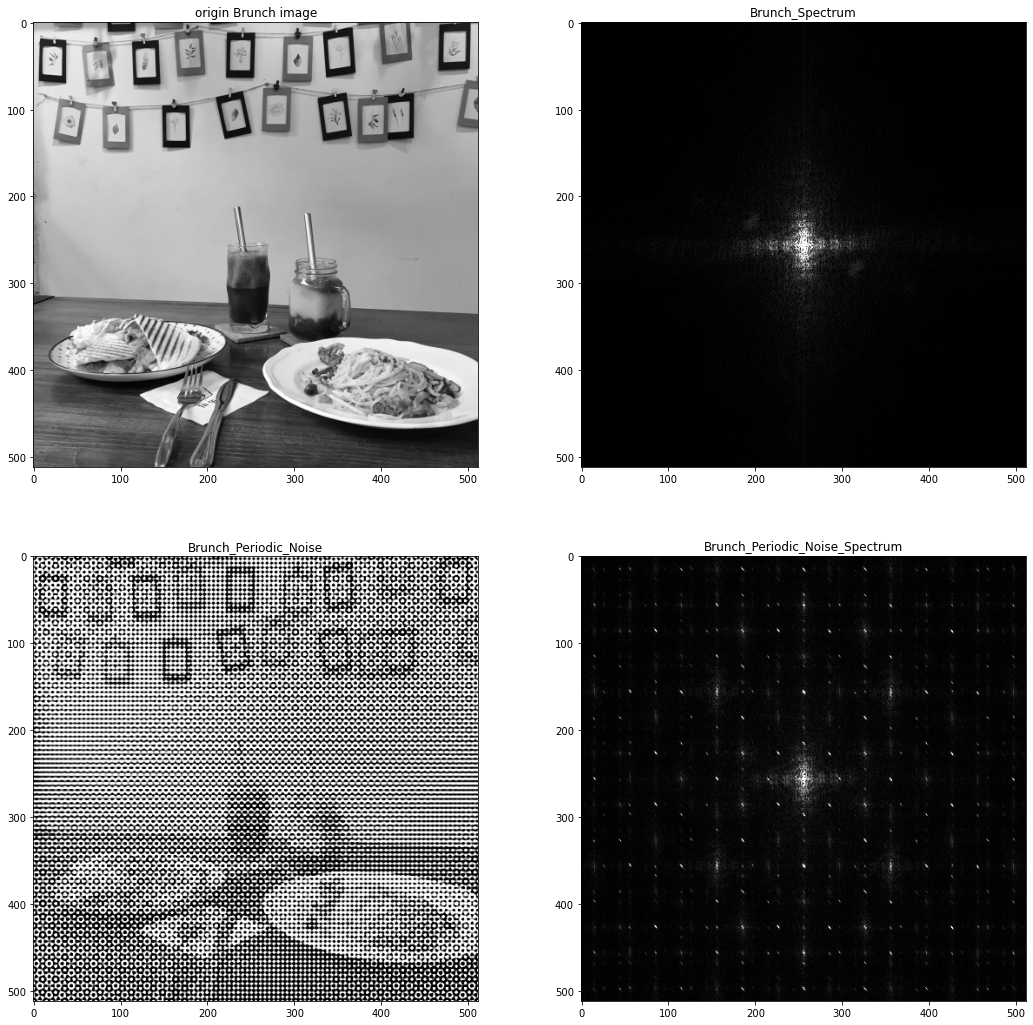

In [1]:
import numpy as np
import cv2
from numpy.fft import fft2, ifft2, fftshift
import matplotlib.pyplot as plt

def fourier_spectrum( f ):
    F = fft2( f )
    Fshift = fftshift( F )
    mag = np.abs( Fshift )
    mag = mag / mag.max( ) * 255.0 * 100.0
    g = np.uint8( np.clip( mag, 0, 255 ) )
    return g

def periodic_noise( f, scale, frequency, angle ):
    g = f.copy( )
    nr, nc = f.shape[:2]

    fp = np.zeros( [ nr, nc ] )      # 前處理
    for x in range( nr ):
        for y in range( nc ):
            fp[x,y] = pow( -1, x + y ) * f[x,y]

    F = fft2( fp )                   # 離散傅立葉轉換
    G = F.copy( )

    magnitude = np.sum( F ) * scale  # 週期性雜訊
    for theta in range( 0, 360, angle ):
        u = int( frequency * np.cos( theta * np.pi / 180 ) + nr / 2 )
        v = int( frequency * np.sin( theta * np.pi / 180 ) + nc / 2 )
        G[u,v] = magnitude

    gp = ifft2( G )     # 反離散傅立葉轉換

    gp2 = np.zeros( [ nr, nc ] )   # 後處理
    for x in range( nr ):
        for y in range( nc ):
            gp2[x,y] = round( pow( -1, x + y ) * np.real( gp[x,y] ), 0 )
    g = np.uint8( np.clip( gp2, 0, 255 ) )

    return g

def main( ):
    f = cv2.imread( "Brunch.bmp", 0 )
    f_spectrum = fourier_spectrum( f )
    g = periodic_noise( f, 0.5, 100, 45 )
    g_spectrum = fourier_spectrum( g )

    plt.figure(figsize=(18, 18))
    plt.subplot(2,2,1)   
    plt.title('origin Brunch image') 
    plt.imshow(f,cmap=plt.cm.gray)
    plt.subplot(2,2,2)     
    plt.title('Brunch_Spectrum') 
    plt.imshow(f_spectrum,cmap=plt.cm.gray)   
    plt.subplot(2,2,3)     
    plt.title('Brunch_Periodic_Noise') 
    plt.imshow(g,cmap=plt.cm.gray)
    plt.subplot(2,2,4)     
    plt.title('Brunch_Periodic_Noise_Spectrum') 
    plt.imshow(g_spectrum,cmap=plt.cm.gray)
main( )

## <font color="Red">6-2: Image Noise</font> <p>
請用下列公式，完成Gaussian Noise、Exponential Noise、Rayleigh Noise、Salt-and-Pepper Noise
<img src=pdfs.png> <p>
<img src=salt_pepper.png> 

Image Degradation with Noise Model
(1) Uniform Noise
(2) Gaussian Noise
(3) Exponential Noise
(4) Rayleigh Noise
(5) Salt and Pepper Noise
Please enter your choice: 2
Please enter scale(e.g., 20): 20


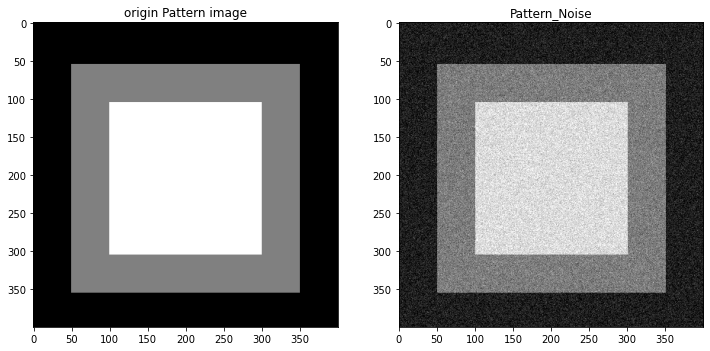

In [2]:
import numpy as np
import cv2
from numpy.random import uniform, normal, exponential, rayleigh
import matplotlib.pyplot as plt

def uniform_noise( f, scale ):  # Uniform noise
    g = f.copy( )
    nr, nc = f.shape[:2]
    for x in range( nr ):
        for y in range( nc ):
            value = f[x,y] + uniform( 0, 1 ) * scale
            g[x,y] = np.uint8( np.clip( value, 0, 255 ) )
    return g

def gaussian_noise( f, scale ):  # Gaussian noise 
    g = f.copy( )
    nr, nc = f.shape[:2]
######################### Code Here Gaussian noise #####################

    return g

def exponential_noise( f, scale ):  # Exponential noise
    g = f.copy( )
    nr, nc = f.shape[:2]
######################### Code Here Exponential noise ####################

    return g

def rayleigh_noise( f, scale ):  # Rayleigh noise
    g = f.copy( )
    nr, nc = f.shape[:2]
######################### Code Here Rayleigh noise #####################

    return g

def salt_pepper_noise( f, probability ):  # Salt-and-Pepper noise
    g = f.copy( )
    nr, nc = f.shape[:2]
    for x in range( nr ):
        for y in range( nc ):
            value = uniform( 0, 1 )
            # Hint: probability/2 being Ps(Probability of salt)
            #       probability/2 being Pp(Probability of pepper)
######################### Code Here Salt-and-Pepper noise #######################

    return g

def histogram( f ):
    if f.ndim != 3:
        hist = cv2.calcHist( [f], [0], None, [256], [0,256] )
        plt.plot( hist )
    else:
        color = ( 'b', 'g', 'r' )
        for i, col in enumerate( color ):
            hist = cv2.calcHist( f, [i], None, [256], [0,256] )
            plt.plot( hist, color = col )
    plt.xlim( [0,256] )
    plt.xlabel( "Intensity" )
    plt.ylabel( "#Intensities" )
    plt.show( )

def main( ):
    print( "Image Degradation with Noise Model" )
    print( "(1) Uniform Noise" )
    print( "(2) Gaussian Noise" )
    print( "(3) Exponential Noise" )
    print( "(4) Rayleigh Noise" )
    print( "(5) Salt and Pepper Noise" )
    method = eval( input( "Please enter your choice: " ) )
    if method >= 1 and method <= 4:
        scale = eval( input( "Please enter scale(e.g., 20): " ) )
    elif method == 5:
        probability = eval( input ( "Please enter probability(e.g., 0.05): " ) )
    else:
        print( "Noise model not supported!" )
        exit( )
    img1 = cv2.imread( "Pattern.bmp", -1 )
    if method == 1:
        img2 = uniform_noise( img1, scale )
    elif method == 2:
        img2 = gaussian_noise( img1, scale )
    elif method == 3:
        img2 = exponential_noise( img1, scale )
    elif method == 4:
        img2 = rayleigh_noise( img1, scale )
    else:
        img2 = salt_pepper_noise( img1, probability )

    plt.figure(figsize=(12, 12))
    plt.subplot(1,2,1)   
    plt.title('origin Pattern image') 
    plt.imshow(img1,cmap=plt.cm.gray)
    plt.subplot(1,2,2)     
    plt.title('Pattern_Noise') 
    plt.imshow(img2,cmap=plt.cm.gray)


main( )

### <font color="Red">6-3: Noise Analysis</font> 
<font color="Red"> Please analyze at lease 3 regions to predict the random noise sigma value   
<font color="Red"> (Noisy_Pattern1.bmp, Noisy_Pattern2.bmp,Noisy_Pattern3.bmp)<p>
<img src="Noisy_Pattern1.bmp" width="300px" height="300px">
<img src="Noisy_Pattern2.bmp" width="300px" height="300px">
<img src="Noisy_Pattern3.bmp" width="300px" height="300px">

Sigma = 44.85772418748635


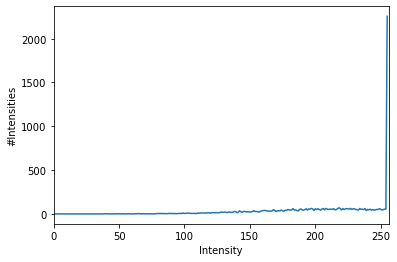

Sigma = 44.85772418748635


In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def histogram( f ):
    if f.ndim != 3:
        print( "Sigma =", np.std( ROI ) )
        hist = cv2.calcHist( [f], [0], None, [256], [0,256] )
        plt.plot( hist )
    else:
        color = ( 'b', 'g', 'r' )
        for i, col in enumerate( color ):
            hist = cv2.calcHist( f, [i], None, [256], [0,256] )
            plt.plot( hist, color = col )
    plt.xlim( [0,256] )
    plt.xlabel( "Intensity" )
    plt.ylabel( "#Intensities" )
    plt.show( )

f = cv2.imread( "Noisy_Pattern3.bmp", 0 )
ROI = f[200:290, 200:290]
histogram( ROI )
print( "Sigma =", np.std( ROI ) )

### <font color="Red"> 6-4: 適應性中值濾波器程式設計  
<font color="Red"> 1. 濾波器大小 S_size 在3, 5, 7 間調整(S_max = 7)  
<font color="Red"> 2. 影像的像素點掃描從 ((S_size-1)/2, (S_size-1)/2) 到 (nr-(S_size-1)/2, nc-(S_size-1)/2)   
<font color="Red"> 3. 請列印出濾波器大小分別在 3x3, 5x5, 7x7, 9x9 的使用次數   
<font color="Red"> 4. 請使用 PSNR 檢視 Median Filter 與 Adaptive Median Filter 的濾波效果     
參考資訊：https://zh.m.wikipedia.org/zh-hant/影像復原   

### <font color="Red"> 6-4: Adaptive Median Filter design    
<font color="Red"> 1. filter size S_size(odd value) is adjusted between 3, 5, 7 (S_max = 7)  
<font color="Red"> 2. image pixel sacnned from ((S_size-1)/2, (S_size-1)/2) to (nr-(S_size-1)/2, nc-(S_size-1)/2)   
<font color="Red"> 3. Please count the numbers of filter sizes 3x3, 5x5, 7x7, 9x9 use   
<font color="Red"> 4. Please use PSNR to verify results of the Median Filter and the Adaptive Median Filter     
references：https://www.researchgate.net/publication/344374155_Image_Restoration_using_Adaptive_Median_Filtering    

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

def sp_noise(image, prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = image.copy()
    if len(image.shape) == 2:
        black = 0
        white = 255            
    else:
        colorspace = image.shape[2]
        if colorspace == 3:  # RGB
            black = np.array([0, 0, 0], dtype='uint8')
            white = np.array([255, 255, 255], dtype='uint8')
        else:  # RGBA
            black = np.array([0, 0, 0, 255], dtype='uint8')
            white = np.array([255, 255, 255, 255], dtype='uint8')
    probs = np.random.random(output.shape[:2])
    output[probs < (prob / 2)] = black
    output[probs > 1 - (prob / 2)] = white
    return output

def psnr2(img1, img2):
    mse = np.mean( (img1 - img2) ** 2 )
    #print("PSNR2:MSE="+str(mse))
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 10 * math.log10(PIXEL_MAX ** 2 / mse)

def median_filter(image):
    nr, nc = img2.shape[:2]
  
    median_image = image.copy()
 
    for i in range(1, nr-1):
        for j in range(1, nc-1):
            temp1 = image[i-1:i+2,j-1:j+2]
            temp2 = np.reshape(temp1,9) 
            temp3 = sorted(temp2)
            median_image[i, j]= temp3[4]
    return median_image 

def adaptive_median_filter(image, S_min, S_max):
#--------------------- Code Here -------------------------#    
    nr, nc = image.shape[:2]
        
    adaptive_median_image = np.zeros(image.shape)
    
    # declare the numbers of filter sizes 3x3, 5x5, 7x7, 9x9 use
    count = np.zeros(S_max+1)
    
    for i in range(nr):
        for j in range(nc):
            
            value, s = Lvl_A(image, i, j, S_min, S_max)
            adaptive_median_image[i,j] = value
            # print(s)
            count[s] += 1
        
    return adaptive_median_image , count 

def Lvl_A(img, x, y, s, sMax):

    window = img[x-(s//2):x+(s//2)+1,y-(s//2):y+(s//2)+1]
    Zmin = np.min(window)
    Zmed = np.median(window)
    Zmax = np.max(window)

    A1 = int(Zmed) - int(Zmin)
    A2 = int(Zmed) - int(Zmax)

    if A1 > 0 and A2 < 0:
        return Lvl_B(window, s)
    else:
        if s+2 <= sMax:
            return Lvl_A(img, x, y, s+2, sMax)
        else:
            return Zmed, s
            
def Lvl_B(window, s):

    nr, nc = window.shape[:2]
    Zmin = np.min(window)
    Zmed = np.median(window)
    Zmax = np.max(window)

    Zxy = window[nr//2, nc//2]
    B1 = int(Zxy) - int(Zmin)
    B2 = int(Zxy) - int(Zmax)

    if B1 > 0 and B2 < 0 :
        return Zxy, s
    else:
        return Zmed, s


sp_prob = 0.65
smallest= 3
largest = 9
img = cv2.imread('Lenna.bmp', cv2.IMREAD_GRAYSCALE)
img2 = sp_noise(img,sp_prob)
img3 = median_filter(img2)
img4, count_vec = adaptive_median_filter(img2, smallest, largest)
print("Salt-and-Pepper noise probability = ", sp_prob)
print("Median filter: PSNR = ", psnr2(img,img3))
print("Adaptive Median filter: PSNR = ", psnr2(img,img4))
for i in range(smallest,largest+1,2):
    print(str(i)+"x"+str(i)+" Adaptive Median block number is ", count_vec[i])

plt.figure(figsize=(16,16))
plt.subplot(2,2,1)     
plt.title('Original image') 
plt.imshow(img,cmap=plt.cm.gray)
plt.subplot(2,2,2)     
plt.title('Salt-and-pepper noised image') 
plt.imshow(img2,cmap=plt.cm.gray) 
plt.subplot(2,2,3)     
plt.title('Median filtered result of Salt-and-pepper noised image') 
plt.imshow(img3,cmap=plt.cm.gray) 
plt.subplot(2,2,4)     
plt.title('Adaptive Median filtered result of Salt-and-pepper noised image') 
plt.imshow(img4,cmap=plt.cm.gray) 

ValueError: zero-size array to reduction operation minimum which has no identity

## <font color="Red"> 6-5: Band Filter Analysis </font> 
請整理成文字檔說明下列資訊 <p>
(a)請解釋<p>
理想帶阻濾波器、理想帶通濾波器、高斯帶阻濾波器<p>
高斯帶通濾波器、巴特沃斯帶阻濾波器、巴特沃斯帶通濾波器 的參數意義<p>
(建議將濾波器繪製出來)<p>
    
(b)檔案 Brunch_Periodic_Noise.bmp 的最佳還原效果<p>
(請說明使用哪一種方法及參數，並採用與Brunch_gray.bmp的PSNR值為判斷依準)

## <font color="Red"> 6-5: Band Filter Analysis:  <p>
<font color="Red"> Please gather these information in a document <p><p> 
<font color="Red"> (a) Please check all variables required be assigned in  
"Ideal band-pass filter", "Ideal band-reject filter", "Gaussian band-pass filter",  
"Gaussian band-pass filter", "Butterworth band-pass filter", and "Butterworth band-pass filter"   
<font color="Red"> (Hint. output the filter as an image or plot as a figure)    <p><p>
<font color="Red"> (b) Please restore the image "Brunch_Periodic_Noise.bmp" to the best recovered image   
<font color="Red"> Please note the filter and parameters used, and result in the PSNR with image: Brunch_gray.bmp    

Brunch_Periodic_Noise: PSNR =  28.652684249529067


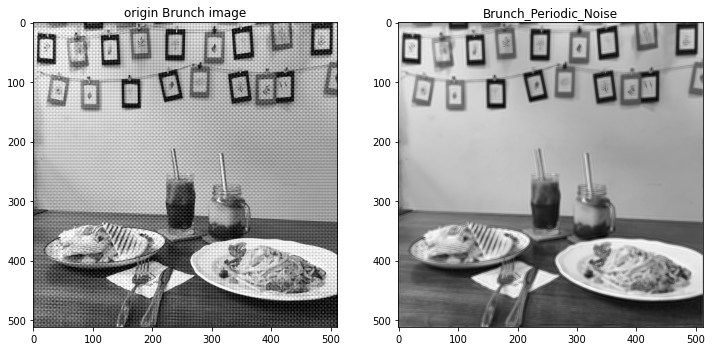

In [13]:
import numpy as np
import cv2
from numpy.fft import fft2, ifft2
import matplotlib.pyplot as plt

def band_filtering( f, filter, D0, width, order ):
    nr, nc = f.shape[:2]

    fp = np.zeros( [ nr, nc ] )  # Pre-processing
    for x in range( nr ):
        for y in range( nc ):
            fp[x,y] = pow( -1, x + y ) * f[x,y]

    F = fft2( fp )   # Discrete Fourier Transform
    G = F.copy( )

    if filter == 1:   # Ideal band-reject filter
        for u in range(nr):
            for v in range(nc):
                dist = np.sqrt( (u-nr/2)*(u-nr/2) + (v-nc/2)*(v-nc/2) )
                if dist >= D0-width/2 and dist <= D0+width/2:
                    G[u,v] = 0

    elif filter == 2:   # Ideal band-pass filter
        for u in range( nr ):
            for v in range( nc ):
                dist = np.sqrt( (u-nr/2) * (u-nr/2) + (v-nc/2)*(v-nc/2) )
                if dist < D0 - width / 2 or dist > D0 + width / 2:
                    G[u,v] = 0

    elif filter == 3:   # Gaussian band-reject filter
        for u in range( nr ):
            for v in range( nc ):
                dist = np.sqrt( (u-nr/2)*(u-nr/2) + (v-nc/2)*(v - nc/2) )
                if dist != 0 and width != 0:
                    H = 1.0 - np.exp( -pow( ( dist*dist - D0*D0 )/( dist*width ), 2 ) )
                    G[u,v] *= H

    elif filter == 4:   # Gaussian band-pass filter
        for u in range( nr ):
            for v in range( nc ):
                dist = np.sqrt( (u-nr/2)*(u-nr/2) + (v-nc/2)*(v-nc/2) )
                if dist != 0 and width != 0:
                    H = np.exp( -pow( ( dist*dist - D0*D0 )/( dist*width ), 2 ) )
                    G[u,v] *= H

    elif filter == 5:   # Butterworth band-reject filter
        for u in range( nr ):
            for v in range( nc ):
                dist = np.sqrt( (u-nr/2)*(u-nr/2) + (v-nc/2)*(v-nc/2) )
                if dist != D0:
                    H = 1.0 / ( 1.0 + pow((dist*width)/(dist*dist-D0*D0), 2*order ) )
                    G[u,v] *= H
                else:
                    G[u,v] = 0

    elif filter == 6:   # Butterworth band-pass filter
        for u in range( nr ):
            for v in range( nc ):
                dist = np.sqrt( (u-nr/2)*(u-nr/2)+(v-nc/2)*(v-nc/2) )
                if dist != D0:
                    H = 1.0 - 1.0/( 1.0 + pow((dist*width)/(dist*dist-D0*D0), 2*order) )
                    G[u,v] *= H

    gp = ifft2( G )   # Inverse Fourier Transform

    gp2 = np.zeros( [ nr, nc ] )   # Post-processing
    for x in range( nr ):
        for y in range( nc ):
            gp2[x,y] = round( pow( -1, x + y ) * np.real( gp[x,y] ), 0 )
    g = np.uint8( np.clip( gp2, 0, 255 ) )

    return g

def psnr3(img1, img2):
    mse = np.mean( (img1 - img2) ** 2 )
    #print("PSNR2:MSE="+str(mse))
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 10 * math.log10(PIXEL_MAX ** 2 / mse)

def main( ):
    img1 = cv2.imread( "Brunch_Periodic_Noise.bmp", -1 )
    img2 = band_filtering( img1, 5, 100, 50.0, 1 )
    
    print("Brunch_Periodic_Noise: PSNR = ", psnr3(img1, img2))
    
    plt.figure(figsize=(12, 12))
    plt.subplot(1,2,1)   
    plt.title('origin Brunch image') 
    plt.imshow(img1,cmap=plt.cm.gray)
    plt.subplot(1,2,2)     
    plt.title('Brunch_Periodic_Noise') 
    plt.imshow(img2,cmap=plt.cm.gray)

main( )

### <font color="Red">6-6: Inverse Filtering </font> 
請依下列資訊，完成 Inverse Filtering 的程式設計 <p>
藉由 cutoff 及 radius 兩個參數，計算  
$$ H = e^{-{((dist^2) \over (2*cutoff^2)) } } $$  
保留距離為radius內的參數，調整為 $$ G*=H $$

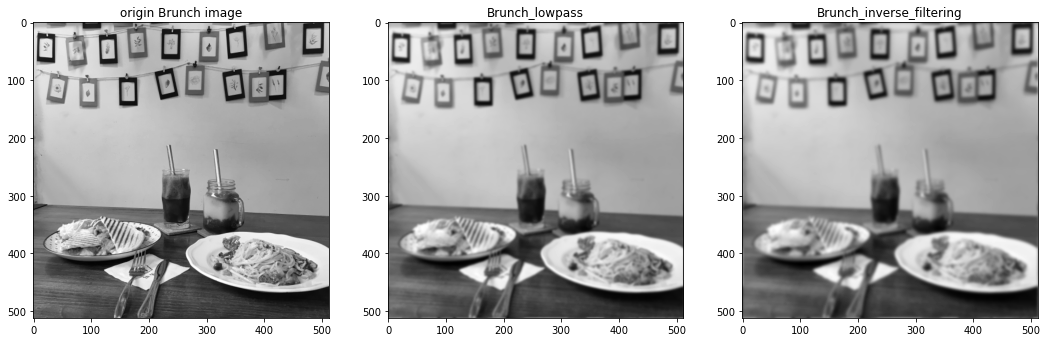

In [6]:
import numpy as np
import cv2
from numpy.fft import fft2, ifft2
import matplotlib.pyplot as plt

def gaussian_lowpass( f, cutoff ):
    nr, nc = f.shape[:2]

    fp = np.zeros( [ nr, nc ] )   # Pre-processing
    for x in range( nr ):
        for y in range( nc ):
            fp[x,y] = pow( -1, x + y ) * f[x,y]
    
    F = fft2( fp )   # Fourier Transform
    G = F.copy( )

    for u in range( nr ):
        for v in range( nc ):
            dist = np.sqrt( (u-nr/2)*(u-nr/2) + (v-nc/2)*(v-nc/2) )
            H = np.exp( -(dist*dist)/(2*cutoff*cutoff) )
            G[u,v] *= H

    gp = ifft2( G )   # Inverse Fourier Transform

    gp2 = np.zeros( [ nr, nc ] )   # Post-processing
    for x in range( nr ):
        for y in range( nc ):
            gp2[x,y] = round( pow( -1, x + y ) * np.real( gp[x,y] ), 0 )
    g = np.uint8( np.clip( gp2, 0, 255 ) )

    return g

def inverse_filtering( f, cutoff, radius ):
    nr, nc = f.shape[:2]

    fp = np.zeros( [ nr, nc ] )   # Pre-processing
    for x in range( nr ):
        for y in range( nc ):
            fp[x,y] = pow( -1, x + y ) * f[x,y]
    
    F = fft2( fp )   # Fourier Transform
    G = F.copy( )
    
################################ Code Here - Inverse Filtering ################


    gp = ifft2( G )     # Inverse Fourier Transform

    gp2 = np.zeros( [ nr, nc ] )   # Post-processing
    for x in range( nr ):
        for y in range( nc ):
            gp2[x,y] = round( pow( -1, x + y ) * np.real( gp[x,y] ), 0 )
    g = np.uint8( np.clip( gp2, 0, 255 ) )

    return g

def main( ):
    img1 = cv2.imread( "Brunch.bmp", 0 )
    img2 = gaussian_lowpass( img1, 50 )
    img3 = inverse_filtering( img2, 50, 100 )
 
    plt.figure(figsize=(18, 18))
    plt.subplot(1,3,1)   
    plt.title('origin Brunch image') 
    plt.imshow(img1,cmap=plt.cm.gray)
    plt.subplot(1,3,2)     
    plt.title('Brunch_lowpass') 
    plt.imshow(img2,cmap=plt.cm.gray)
    plt.subplot(1,3,3)     
    plt.title('Brunch_inverse_filtering') 
    plt.imshow(img3,cmap=plt.cm.gray)
    
main( )

Wiener Filter

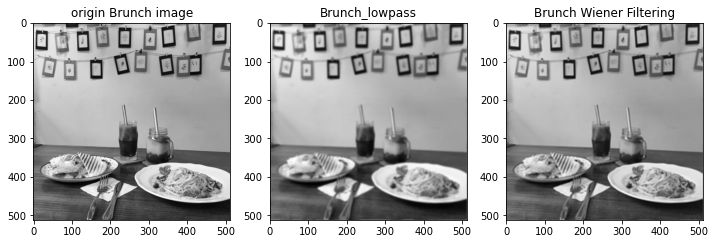

In [7]:
import numpy as np
import cv2
from numpy.fft import fft2, ifft2
import matplotlib.pyplot as plt

def gaussian_lowpass( f, cutoff ):
    nr, nc = f.shape[:2]

    fp = np.zeros( [ nr, nc ] )  # Pre-processing
    for x in range( nr ):
        for y in range( nc ):
            fp[x,y] = pow( -1, x + y ) * f[x,y]

    F = fft2( fp )   # Discrete Fourier Transform
    G = F.copy( )

    for u in range( nr ):
        for v in range( nc ):
            dist = np.sqrt( ( u - nr / 2 ) * ( u - nr / 2 ) +
                           ( v - nc / 2 ) * ( v - nc / 2 ) )
            H = np.exp( -( dist * dist ) / ( 2 * cutoff * cutoff ) )
            G[u,v] *= H	

    gp = ifft2( G )     # Inverse Discrete Fourier Transform

    gp2 = np.zeros( [ nr, nc ] )   # Post-processing
    for x in range( nr ):
        for y in range( nc ):
            gp2[x,y] = round( pow( -1, x + y ) * np.real( gp[x,y] ), 0 )
    g = np.uint8( np.clip( gp2, 0, 255 ) )

    return g

def wiener_filtering( f, cutoff, K ):
    nr, nc = f.shape[:2]
    
    fp = np.zeros( [ nr, nc ] )   # Pre-processing
    for x in range( nr ):
        for y in range( nc ):
            fp[x,y] = pow( -1, x + y ) * f[x,y]

    F = fft2( fp )   # Discrete Fourier Transform
    G = F.copy( )

    for u in range( nr ):   # Wiener Filtering
        for v in range( nc ):
            dist = np.sqrt( ( u - nr / 2 ) * ( u - nr / 2 ) +
                           ( v - nc / 2 ) * ( v - nc / 2 ) )
            H = np.exp( -( dist * dist ) / ( 2 * cutoff * cutoff ) )
            H = H / ( H * H + K )
            G[u,v] *= H

    gp = ifft2( G )   # Inverse Discrete Fourier Transform

    gp2 = np.zeros( [ nr, nc ] ) # Post-processing
    for x in range( nr ):
        for y in range( nc ):
            gp2[x,y] = round( pow( -1, x + y ) * np.real( gp[x,y] ), 0 )
    g = np.uint8( np.clip( gp2, 0, 255 ) )

    return g

def main( ):
    img1 = cv2.imread( "Brunch.bmp", 0 )
    img2 = gaussian_lowpass( img1, 50 )
    img3 = wiener_filtering( img2, 50, 0.05 )
    
    plt.figure(figsize=(12, 12))
    plt.subplot(1,3,1)   
    plt.title('origin Brunch image') 
    plt.imshow(img1,cmap=plt.cm.gray)
    plt.subplot(1,3,2)     
    plt.title('Brunch_lowpass') 
    plt.imshow(img2,cmap=plt.cm.gray)
    plt.subplot(1,3,3)     
    plt.title('Brunch Wiener Filtering') 
    plt.imshow(img3,cmap=plt.cm.gray)
    
main( )